Otra fantástica característica de Pandas es su robusto manejo de fechas y horas.  Al utilizar estas herramientas, podemos extraer el año, el mes, la semana o incluso el nombre del día de la semana en columnas nuevas.  Tal vez en tu conjunto de datos hay una correlación entre el mes en el que ocurre algo y el objetivo que quieres predecir.  Echemos un vistazo a algunos datos de la venta de casas en el condado de King y creamos nuevas columnas para el mes que se vende una casa y el día de la semana que se vendió.

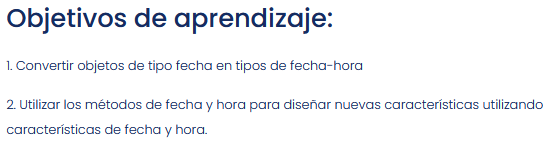

In [1]:
import pandas as pd
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSrgrUnz8mdosU-_k0aECouymqwds_mlaHpYlXzRtf7MBJ4N1r1inCfSDebaXwTVfLtH133EhwKf3mi/pub?gid=394699239&single=true&output=csv',                  usecols=['date','price','bedrooms','bathrooms'])
df2.head()

,date,price,bedrooms,bathrooms
0,20141013T000000,221900.0,3,1.00
1,20141209T000000,538000.0,3,2.25
2,20150225T000000,180000.0,2,1.00
3,20141209T000000,604000.0,4,3.00
4,20150218T000000,510000.0,3,2.00


En este caso la columna “date” (fecha) cargada como un tipo “object” (objeto).  Podemos utilizar pd.to_datetime() para cambiar el la hora a datatime. df2['date'] = pd.to_datetime(df2

In [2]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       21613 non-null  datetime64[ns]
 1   price      21613 non-null  float64       
 2   bedrooms   21613 non-null  int64         
 3   bathrooms  21613 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 675.5 KB


Ahora que es un tipo de fecha y hora, podemos hacer muchas cosas divertidas con el conjunto de atributos series.dt, como series.dt.year, series.dt.month, series.dt.day (día del mes), Series.dt.weekday (día de la semana), etc.  [Aquí hay más información sobre qué puede hacer una funcionalidad de fecha y hora en Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).  También hay algunos métodos divertidos para recuperar los nombres de los meses o los días de la semana.  Estos son métodos, no atributos como los anteriores:  Series.dt.day_name () y Series.dt.month_name ()

Hagamos nuevas columnas para el día de la semana y el mes del año que una casa se vendió.  Quizás las casas se vendan más en los fines de semanas o durante ciertas temporadas.  Queremos que nuestro modelo sea capaz de capturar esa tendencia.

In [3]:
df2['year'] = df2['date'].dt.year
df2['month (numeric)'] = df2['date'].dt.month
df2['month (name)'] = df2['date'].dt.month_name()
df2['day of month'] = df2['date'].dt.day
df2['day of week (numeric)'] = df2['date'].dt.weekday
df2['day of week (name)'] = df2['date'].dt.day_name()
df2.head()

,date,price,bedrooms,bathrooms,year,month (numeric),month (name),day of month,day of week (numeric),day of week (name)
0,2014-10-13,221900.0,3,1.00,2014,10,October,13,0,Monday
1,2014-12-09,538000.0,3,2.25,2014,12,December,9,1,Tuesday
2,2015-02-25,180000.0,2,1.00,2015,2,February,25,2,Wednesday
3,2014-12-09,604000.0,4,3.00,2014,12,December,9,1,Tuesday
4,2015-02-18,510000.0,3,2.00,2015,2,February,18,2,Wednesday


## Resumen

Las características de fecha y hora contienen mucha más información de lo aparentan.  La información sobre lo que pasó en algún mes, en alguna temporada o en algún día de la semana puede ser información importante que podríamos perder si no la extraemos utilizando los métodos de datatime de Pandas.

